Mei-An Blatchford 115943339

In [170]:
!pip install folium
import folium
import requests
import pandas
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
import numpy as np
from folium import FeatureGroup
import matplotlib.pyplot as plt

arrest_table = pandas.read_csv("https://cmsc320.github.io/files/BPD_Arrests.csv")

arrest_table = arrest_table[pandas.notnull(arrest_table["Location 1"])]

arrest_table["lat"], arrest_table["long"] = arrest_table["Location 1"].str.split(",").str
arrest_table["lat"] = arrest_table["lat"].str.replace("(", "").astype(float)
arrest_table["long"] = arrest_table["long"].str.replace(")", "").astype(float)
arrest_table.head()

<ipython-input-170-6712325f5caf>:16: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  arrest_table["lat"], arrest_table["long"] = arrest_table["Location 1"].str.split(",").str


,arrest,age,race,sex,arrestDate,arrestTime,arrestLocation,incidentOffense,incidentLocation,charge,chargeDescription,district,post,neighborhood,Location 1,lat,long
1,11127013.0,37,B,M,01/01/2011,00:01:00,2000 Wilkens Ave,79-Other,Wilkens Av & S Payson St,1 1425,Reckless Endangerment || Hand Gun Violation,SOUTHERN,934.0,Carrollton Ridge,"(39.2814026274, -76.6483635135)",39.281403,-76.648364
2,11126887.0,46,B,M,01/01/2011,00:01:00,2800 Mayfield Ave,Unknown Offense,NaN,NaN,Unknown Charge,NORTHEASTERN,415.0,Belair-Edison,"(39.3227699160, -76.5735750473)",39.322770,-76.573575
3,11126873.0,50,B,M,01/01/2011,00:04:00,2100 Ashburton St,79-Other,2100 Ashburton St,1 1106,Reg Firearm:Illegal Possession || Hgv,WESTERN,735.0,Panway/Braddish Avenue,"(39.3117196723, -76.6623546313)",39.311720,-76.662355
4,11126968.0,33,B,M,01/01/2011,00:05:00,4000 Wilsby Ave,Unknown Offense,1700 Aliceanna St,NaN,Unknown Charge,NORTHERN,525.0,Pen Lucy,"(39.3382885254, -76.6045667070)",39.338289,-76.604567
5,11127041.0,41,B,M,01/01/2011,00:05:00,2900 Spellman Rd,81-Recovered Property,2900 Spelman Rd,1 1425,Reckless Endangerment || Handgun Violation,SOUTHERN,924.0,Cherry Hill,"(39.2449886230, -76.6273582432)",39.244989,-76.627358


In [171]:
map_osm = folium.Map(location=[39.29, -76.61], zoom_start=12)
#map_osm

In [172]:
gun_violence =  []
arrest_table = arrest_table.dropna() #drop nan values
#Filtering through the crimes and tracking the arrest number of crimes that involve gun or firearm
for index, row in arrest_table.iterrows(): 
    charge_descript = str(row['chargeDescription'])
    if 'gun' in charge_descript or 'firearm' in charge_descript:
        gun_violence.append(row['arrest'])

In [173]:
m = folium.Map(location=[39.29, -76.61], zoom_start=12,control_scale=True)

f_layer = FeatureGroup(name="Female")
f_cluster = MarkerCluster().add_to(f_layer)
m_layer = FeatureGroup(name="Male")
m_cluster = MarkerCluster().add_to(m_layer)
f_crimes = []
m_crimes = [] 
#Adding sex specific gun crimes to their specific layers 
for arrest in gun_violence:
    row = arrest_table.loc[arrest_table['arrest'] == arrest]
    if row['sex'].item() == 'F':
        folium.Marker(location = [row['lat'], row['long']], popup="Arrest of a female", icon=folium.Icon(color="red", icon="fa-female", prefix='fa')).add_to(f_cluster)
        f_crimes.append(arrest)
    elif row['sex'].item() == 'M':
        folium.Marker( location = [row['lat'], row['long']], popup="Arrest of a male", icon=folium.Icon(color="blue", icon="fa-male", prefix='fa')).add_to(m_cluster)
        m_crimes.append(arrest)
m.add_child(f_layer)
m.add_child(m_layer)
m.add_child(folium.LayerControl())
m

The interactive map above shows arrests of people with charges involving guns or firearms grouped by sex. From the dataset, I filtered through the charge description and filtered all the incidents involving a gun or firearm. Then I filtered all the crimes involving guns between two sexes, dropping the incidents where sex was unknown. Using FeatureGroups, I was able to seperate arrests of females veruses males. The use of layers allows the user to select what data they want to view and the use of marker cluster allows data to be grouped from a distance. In additon, I used different marker icons to further distinguish the arrests. From the data, we can see that males were involved in more arrests charges involving guns than females. We can also see a larger cluster in the middle of city, this may be due to the higher population in that area. 

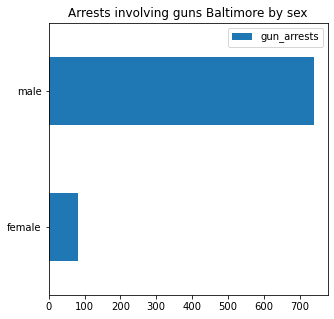

In [185]:
df = pandas.DataFrame({'gun_arrests': [len(f_crimes), len(m_crimes)]}, index=['female', 'male'])
plot = df.plot.barh(figsize=(5, 5), title='Arrests involving guns Baltimore by sex')

From the graph above, we can see that males are arrested for the majority of the gun related incidents in Baltimore compared to females.

In [180]:
#Looking at crimes committed by either sex with regard to race
races = arrest_table['race'].unique()
f_race_dict = dict()
m_race_dict = dict()
for race in races: 
    f_race_dict[race] = 0
    m_race_dict[race] = 0

In [181]:
#getting race of the females arrested
for arrest in f_crimes:
    row = arrest_table.loc[arrest_table['arrest'] == arrest]
    f_race_dict[row['race'].item()] += 1

In [182]:
#getting race of the males arrested
for arrest in m_crimes:
    row = arrest_table.loc[arrest_table['arrest'] == arrest]
    m_race_dict[row['race'].item()] += 1

Text(0.5, 0, 'Number of arrests')

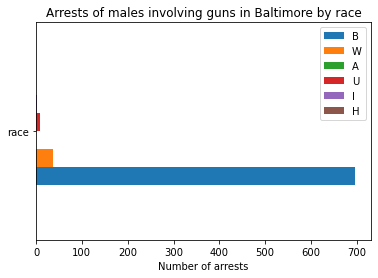

In [183]:
#Plotting
m_races = pandas.DataFrame.from_dict(m_race_dict,orient='index',  columns=['race'])
m_race_plot = m_races.T.plot.barh(title='Arrests of males involving guns in Baltimore by race')
m_race_plot.set_xlabel('Number of arrests')

Text(0.5, 0, 'Number of arrests')

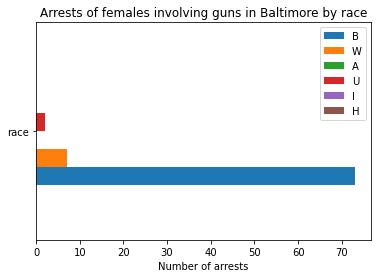

In [184]:
#Plotting females arrested divi
f_races = pandas.DataFrame.from_dict(f_race_dict,orient='index', columns=['race'])
f_race_plot = f_races.T.plot.barh(title='Arrests of females involving guns in Baltimore by race')
f_race_plot.set_xlabel('Number of arrests')

From the two bar graphs above, we can see that arrests of races are porportional based on sex. Black males and females are arrested more for charges that involve firearms or guns than other races. While white males and females make up 12% of the arrests for their sex. 